###import Library###

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

##1. Pemahaman Dataset##

### Pengennalan Dataset ###

**Sumber Data**

Dataset ini berasal dari [Kaggle]( https://www.kaggle.com/datasets/rafunlearnhub/weatherhistory/data ), sebuah platform komunitas data sains yang menyediakan berbagai dataset untuk analisis dan pembelajaran mesin.


**Variabel dalam Dataset**
- Dataset ini mencakup beberapa variabel cuaca yang relevan, antara lain:
-Temperature (C): Suhu udara dalam derajat Celsius.
- Humidity: Kelembaban relatif udara, dinyatakan dalam persentase.
- Wind Speed (km/h): Kecepatan angin dalam kilometer per jam.
- Wind Bearing (degrees): Arah dari mana angin bertiup, dinyatakan dalam derajat.
- Visibility (km): Jarak pandang dalam kilometer.
- Pressure (millibars): Tekanan atmosfer dalam millibar.
- Precip Type: Jenis presipitasi, seperti hujan atau salju.

**Konteks Penggunaan**
Variabel-variabel tersebut dapat digunakan untuk membangun model prediksi suhu udara (Temperature (C)). Dengan menganalisis hubungan antara suhu dan variabel lainnya seperti kelembaban, kecepatan angin, arah angin, jarak pandang, tekanan atmosfer, dan jenis presipitasi. Pendekatan ini berguna dalam berbagai aplikasi, seperti perencanaan energi, pertanian, dan manajemen bencana.

### Anasisis Informasi Statistik ###

In [ ]:
# membaca dataset
df = pd.read_csv('weatherHistory.csv')

In [ ]:
# melihat statistik dasar dataset
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
#melihat informasil dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### Visualisasi Distribusi Data ###

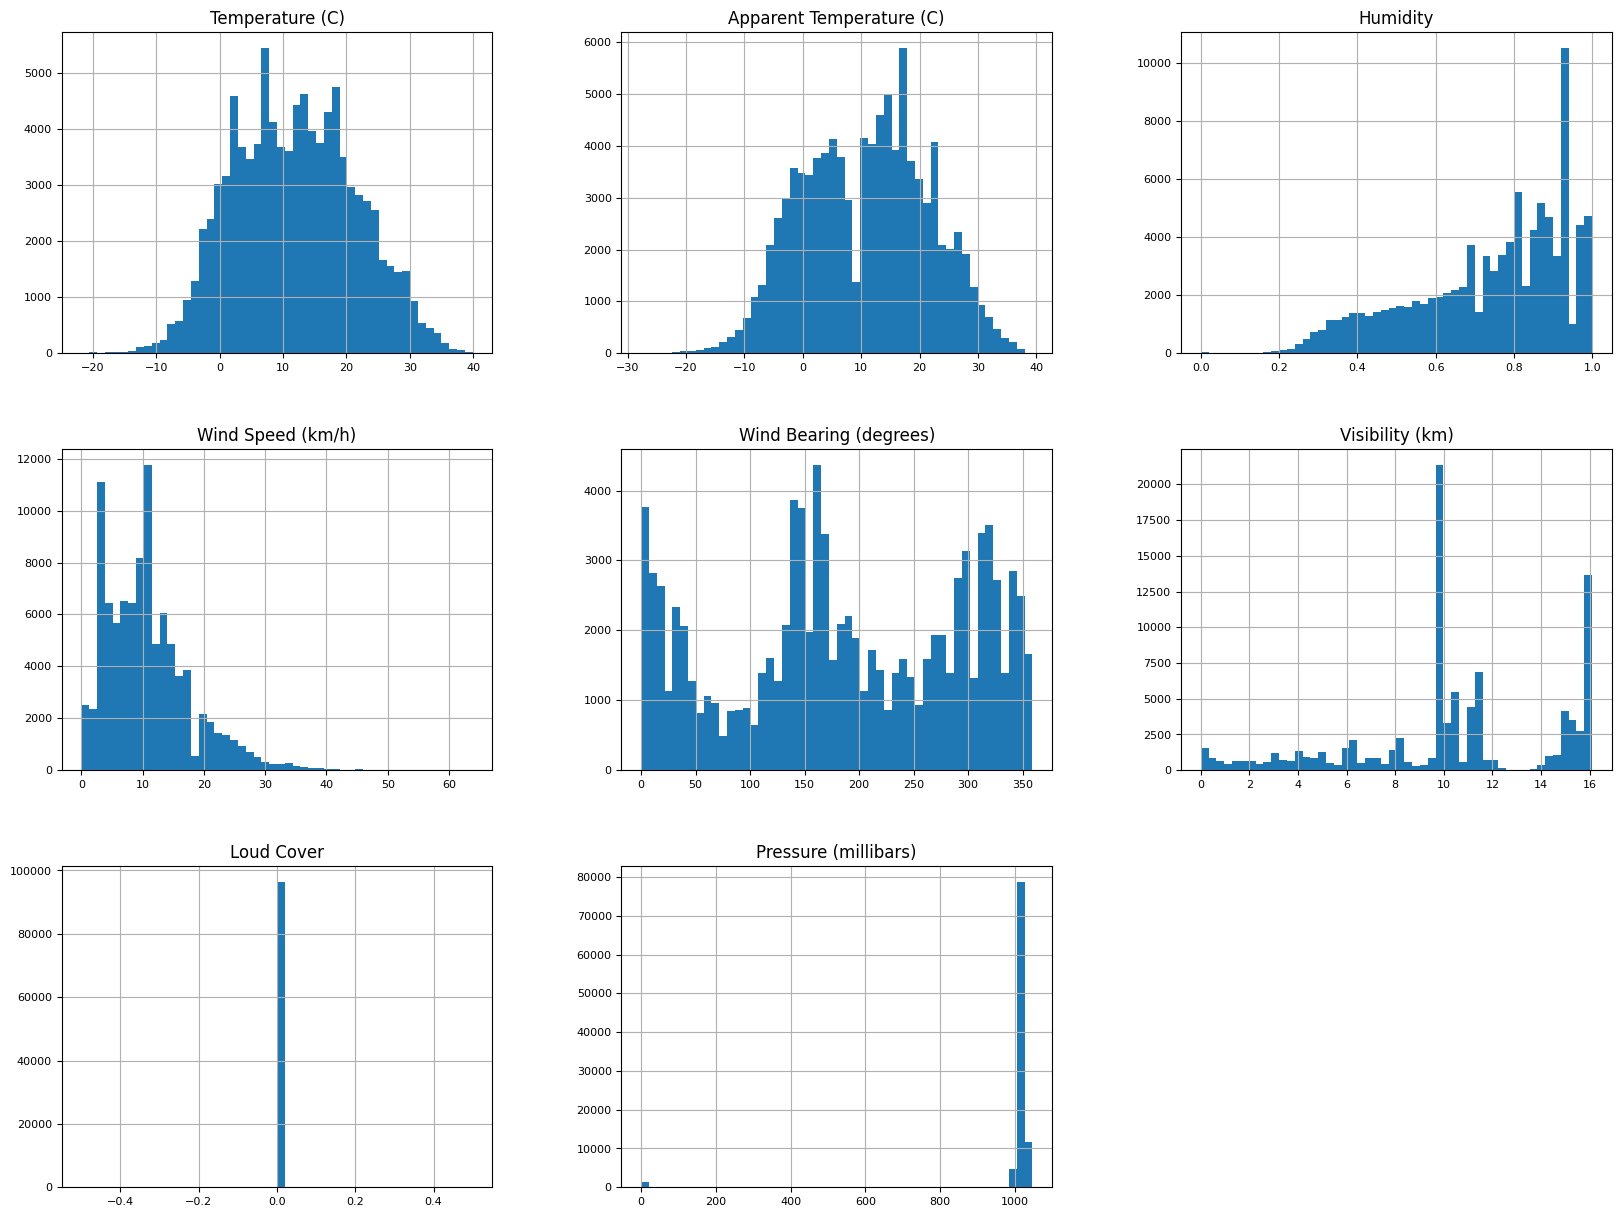

In [ ]:
# melihat distribusi kolom numerik
df.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8);


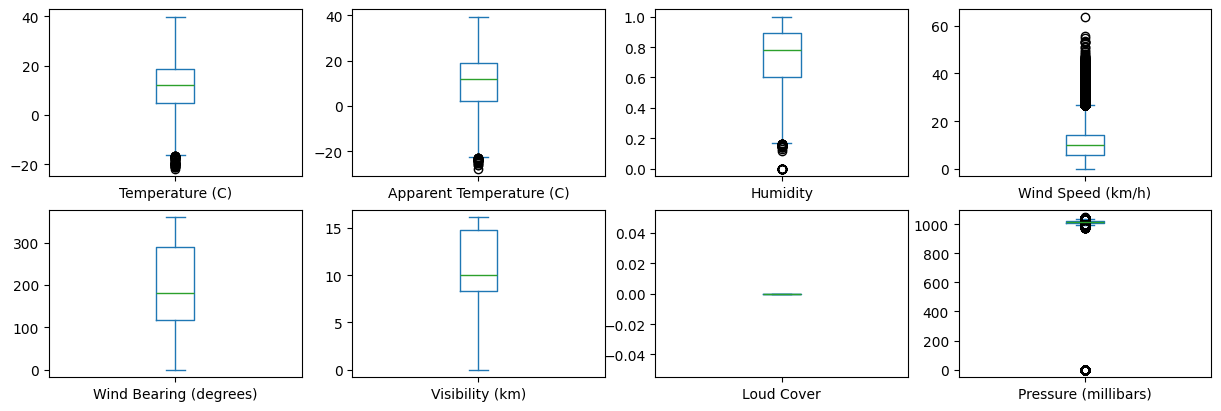

In [ ]:
# Membuat boxplot untuk kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()


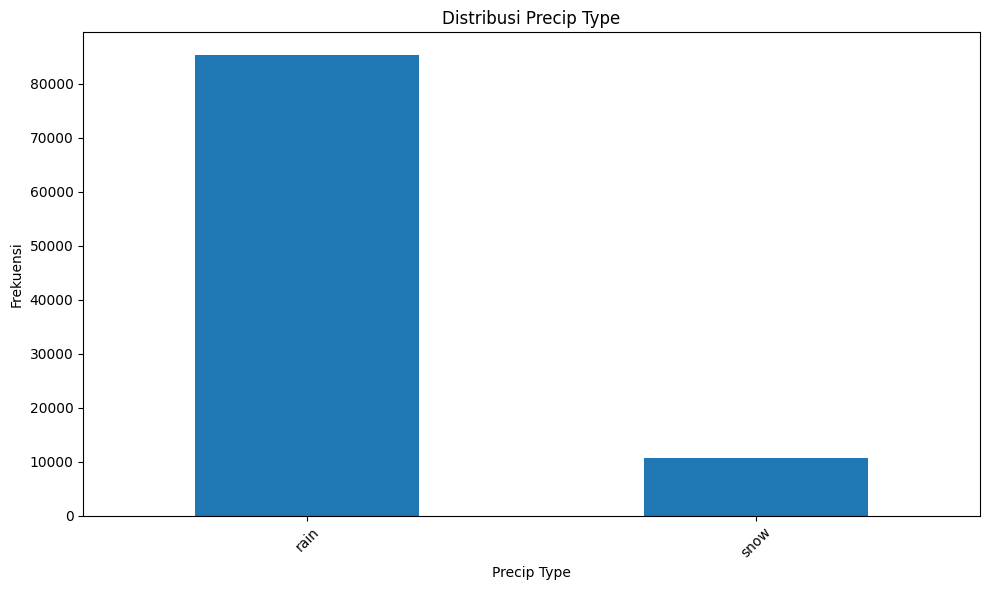

In [ ]:
# Visualisasi distribusi kolom kategorikal

plt.figure(figsize=(10, 6))
# Check if 'Precip Type' column exists and has non-null values
if 'Precip Type' in df.columns and df['Precip Type'].notna().any():
    df['Precip Type'].value_counts().plot(kind='bar')
    plt.title(f'Distribusi Precip Type')
    plt.xlabel('Precip Type')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Precip Type' is missing or contains only null values.")


## 2. Eksplorasi Data dan Pra-pemrosesan

##Eksplorasi Data##

In [ ]:
# mengecek missing value
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
# menghapus missing value
df.dropna(inplace=True)

In [ ]:
# megecek data duplikat
df.duplicated().sum()

np.int64(24)

In [ ]:
# menghapus data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# Encode 'Precip Type' column
df['Precip Type'] = df['Precip Type'].map({'rain': 0, 'snow': 1})

# Selected columns
df_selected = df.select_dtypes(include=np.number)
df_selected = df_selected.drop(columns=['Loud Cover'], errors='ignore')

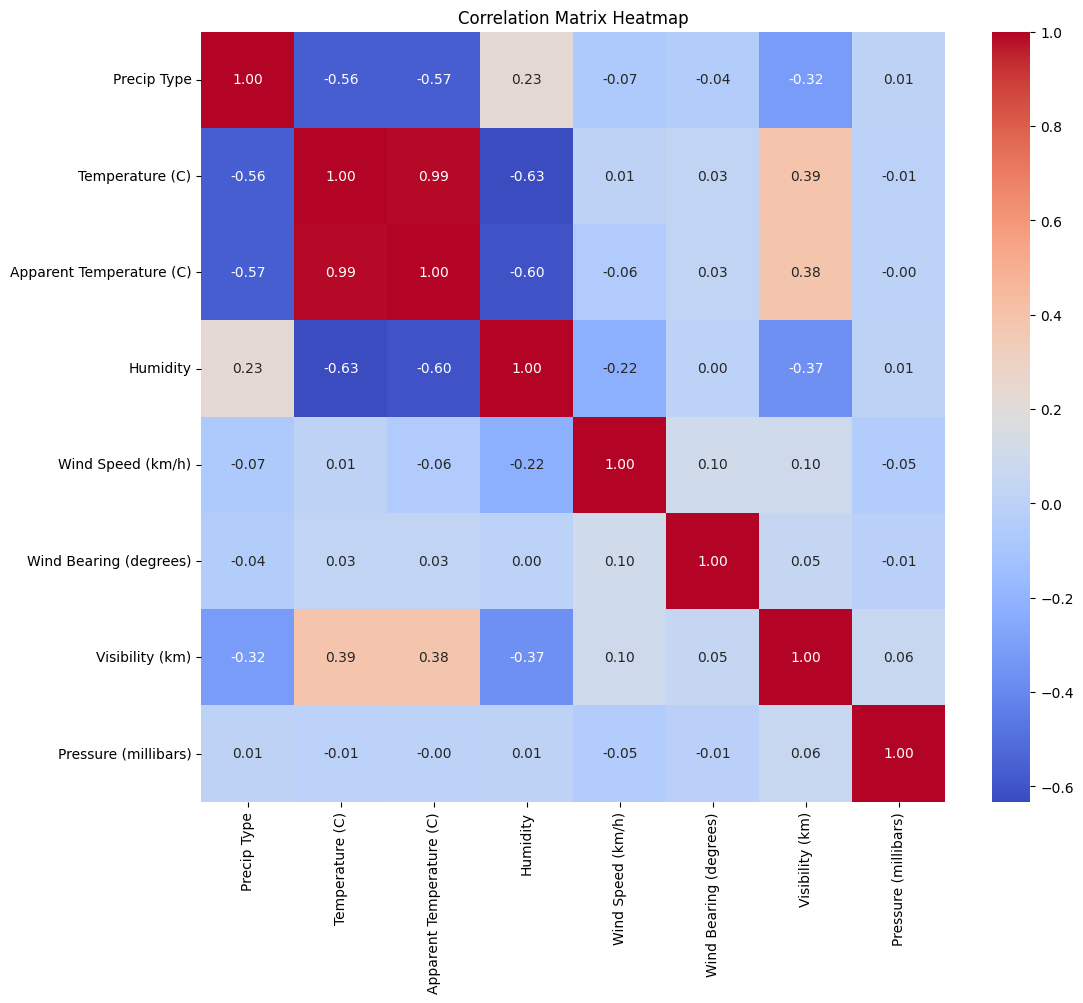

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


### preprosesing ###

In [ ]:
# menghapus kolom yang meiliki multikolinearitas tinggi
df_selected = df_selected.drop(columns=['Apparent Temperature'], errors='ignore')

In [ ]:
# menangani outlier
def replace_lower_outliers_with_iq3(df, column):
    """Replaces lower outliers in a specified column with the IQR upper bound (Q3).

    Args:
        df: The pandas DataFrame.
        column: The name of the column to process.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR

    # Identify lower outliers
    outliers = df[(df[column] < lower_bound)]

    # Replace lower outliers with Q3
    df.loc[outliers.index, column] = Q3

    return df

df_selected = replace_lower_outliers_with_iq3(df_selected, 'Temperature (C)')
df_selected = replace_lower_outliers_with_iq3(df_selected, 'Apparent Temperature (C)')
df_selected = replace_lower_outliers_with_iq3(df_selected, 'Humidity')
df_selected = replace_lower_outliers_with_iq3(df_selected, 'Wind Speed (km/h)')
df_selected = replace_lower_outliers_with_iq3(df_selected, 'Wind Bearing (degrees)')
df_selected = replace_lower_outliers_with_iq3(df_selected, 'Visibility (km)')
df_selected = replace_lower_outliers_with_iq3(df_selected, 'Pressure (millibars)')




In [ ]:
# Inisialisasi RobustScaler
scaler = RobustScaler()

# Fit dan transform data numerik
numerical_cols = df_selected.columns
df_scaled = scaler.fit_transform(df_selected)

# Buat DataFrame baru dari data yang telah di-scale
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)


## 3. Implementasi Model ##

**DataSpliting**

In [ ]:
# Split data into features (X) and target (y)
X = df_scaled.drop('Temperature (C)', axis=1)
y = df_scaled['Temperature (C)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**inisiasi model Linear Refression**

In [ ]:

# Initialize Linear Regression model
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

**Inisiasi model Polynomial Regression dengan hyperparameters**

In [ ]:
# Create a pipeline with PolynomialFeatures and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],  # Try different polynomial degrees
    'ridge__alpha': [0.1, 1, 10]  # Try different regularization strengths
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best hyperparameters: {best_params}")

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


Best hyperparameters: {'polynomialfeatures__degree': 4, 'ridge__alpha': 0.1}
Mean Squared Error: 0.001540436511720239
R-squared: 0.9965991745476339
Mean Absolute Error: 0.018373209021861008


## 4. Evaluasi Model ##

In [ ]:
# Predict using the linear model
y_pred_linear = linear_model.predict(X_test)

# Evaluate the linear model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")
print(f"Mean Absolute Error: {mae_linear}")

print("\nPolynomial Regression Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

# Comparison
print("\nModel Comparison:")
print(f"{'Metric':<20} {'Linear Regression':<20} {'Polynomial Regression':<20}")
print(f"{'Mean Squared Error':<20} {mse_linear:<20.4f} {mse:<20.4f}")
print(f"{'R-squared':<20} {r2_linear:<20.4f} {r2:<20.4f}")
print(f"{'Mean Absolute Error':<20} {mae_linear:<20.4f} {mae:<20.4f}")



Linear Regression Model Evaluation:
Mean Squared Error: 0.0062403013651759565
R-squared: 0.9862232714223153
Mean Absolute Error: 0.05211328212419144

Polynomial Regression Model Evaluation:
Mean Squared Error: 0.001540436511720239
R-squared: 0.9965991745476339
Mean Absolute Error: 0.018373209021861008

Model Comparison:
Metric               Linear Regression    Polynomial Regression
Mean Squared Error   0.0062               0.0015              
R-squared            0.9862               0.9966              
Mean Absolute Error  0.0521               0.0184              


##5. Analisis Hasil ##

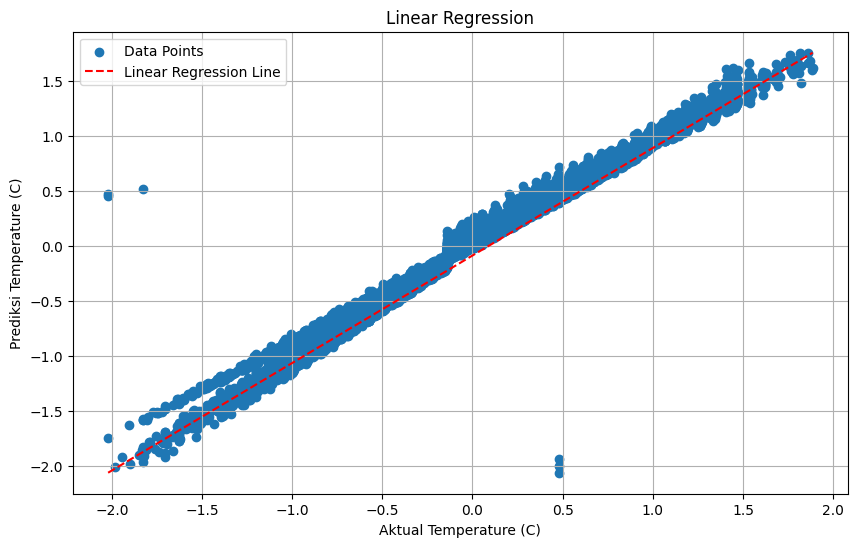

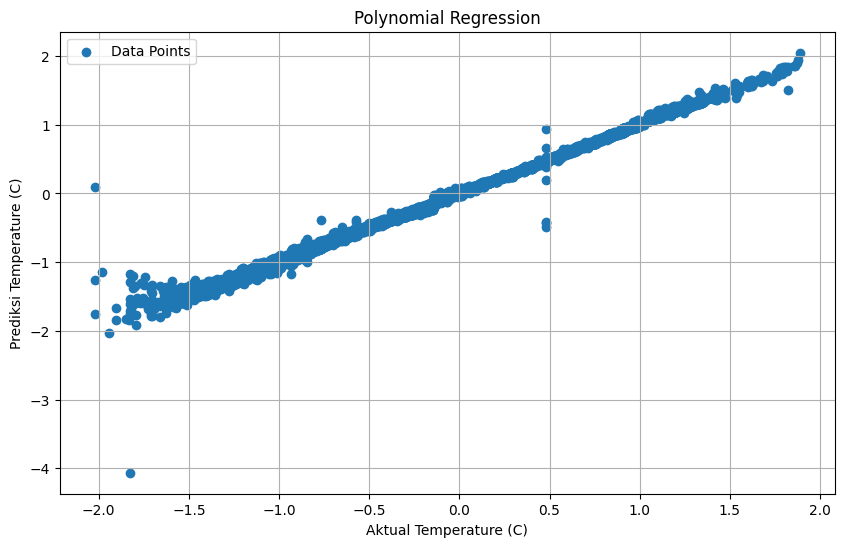

In [ ]:
# Visualisasi Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_pred_linear), max(y_pred_linear)], color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Aktual Temperature (C)')
plt.ylabel('Prediksi Temperature (C)')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi Polynomial Fit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Data Points')
plt.xlabel('Aktual Temperature (C)')
plt.ylabel('Prediksi Temperature (C)')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()



Interpretasi Koefisien Regresi (Linear Regression):
Precip Type: 0.0051
Apparent Temperature (C): 1.0041
Humidity: -0.0387
Wind Speed (km/h): 0.0411
Wind Bearing (degrees): -0.0047
Visibility (km): 0.0012
Pressure (millibars): -0.0129
Intercept: 0.0545


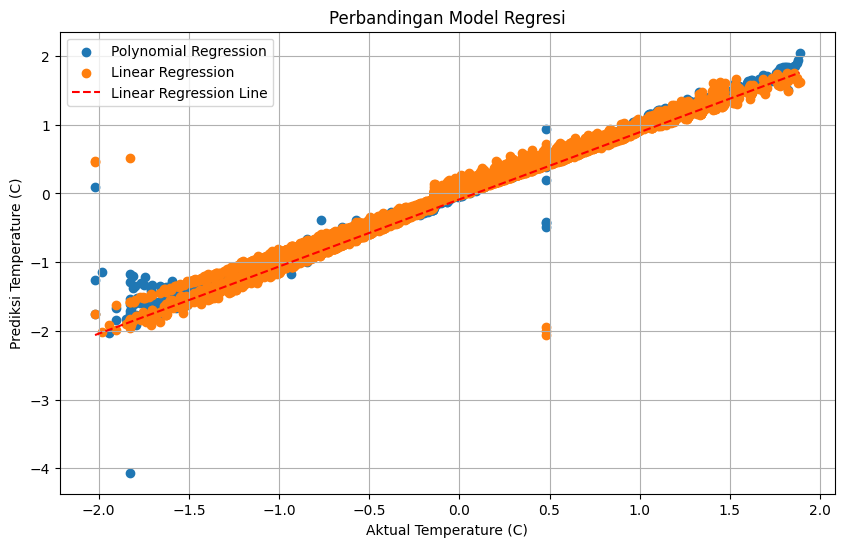

In [ ]:
# Interpretasi Koefisien Regresi (Linear Regression)
print("\nInterpretasi Koefisien Regresi (Linear Regression):")
for i, col in enumerate(X.columns):
    print(f"{col}: {linear_model.coef_[i]:.4f}")
print(f"Intercept: {linear_model.intercept_:.4f}")


# Visualisasi Regression Line dan Polynomial Fit
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(y_test, y_pred, label='Polynomial Regression')
plt.scatter(y_test, y_pred_linear, label='Linear Regression')

# Plot regression line
plt.plot([min(y_test), max(y_test)], [min(y_pred_linear), max(y_pred_linear)], color='red', linestyle='--', label='Linear Regression Line')


# Add labels and title
plt.xlabel('Aktual Temperature (C)')
plt.ylabel('Prediksi Temperature (C)')
plt.title('Perbandingan Model Regresi')
plt.legend()
plt.grid(True)
plt.show()


##6. Kesimpulan ##

### 🔹 Linear Regression
- **Mean Squared Error (MSE):** 0.0062  
- **R-squared (R²):** 0.9862  
- **Mean Absolute Error (MAE):** 0.0521  

Model ini sudah cukup baik karena memiliki R² yang tinggi (98.62%), artinya model mampu menjelaskan sebagian besar variansi dari data aktual. Namun, masih terdapat sedikit penyimpangan (error) dalam prediksi.

### 🔹 Polynomial Regression
- **Mean Squared Error (MSE):** 0.0015  
- **R-squared (R²):** 0.9966  
- **Mean Absolute Error (MAE):** 0.0184  

Model Polynomial menunjukkan performa yang **lebih unggul** dibandingkan Linear Regression. Dengan MSE dan MAE yang lebih kecil serta R² yang lebih tinggi (99.66%), model ini jauh lebih akurat dalam menangkap kompleksitas hubungan non-linear dalam data.

---

## 📈 Visualisasi Model
- Grafik pertama (**Linear Regression**) menunjukkan sebaran prediksi yang sudah cukup dekat dengan garis regresi ideal.
- Grafik kedua memperlihatkan bahwa **model Polynomial Regression** (titik biru) menghasilkan prediksi yang lebih mendekati nilai aktual, terutama di daerah ekstrim, dibandingkan model linear (titik oranye).

---

## 🧠 Interpretasi Koefisien Regresi (Linear Regression)
Variabel yang paling memengaruhi prediksi suhu:
- **Apparent Temperature (C):** 1.0041 → Korelasi sangat kuat dan positif terhadap suhu aktual.
- **Humidity:** -0.0387 → Kenaikan kelembapan sedikit menurunkan suhu aktual.
- **Wind Speed (km/h):** 0.0411 → Kecepatan angin memiliki kontribusi positif terhadap suhu.
- Variabel lain seperti **Pressure** dan **Wind Bearing** memiliki pengaruh lebih kecil.

---

## ✅ Kesimpulan Umum
- Jika hubungan antar variabel cenderung **linear**, maka **Linear Regression** sudah cukup baik.
- Namun, jika terdapat pola **non-linear**, maka **Polynomial Regression** memberikan hasil **yang jauh lebih akurat**.
- **Disarankan menggunakan Polynomial Regression** jika tujuannya adalah meminimalkan error dan meningkatkan akurasi prediksi suhu.
